# Первая нейросетка

Ну что ж, пришло время построить свою первую нейронную сеть. У нас будет искуственная задачка и мы посмотрим на её примере, как работают различные алгоритмы машинного обучения.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('data.csv',index_col=0)

Как и в любой задаче машинного обучения для начала надо визуализировать данные. 
Не зря же нашу нейронную сеть мы так долго учим?


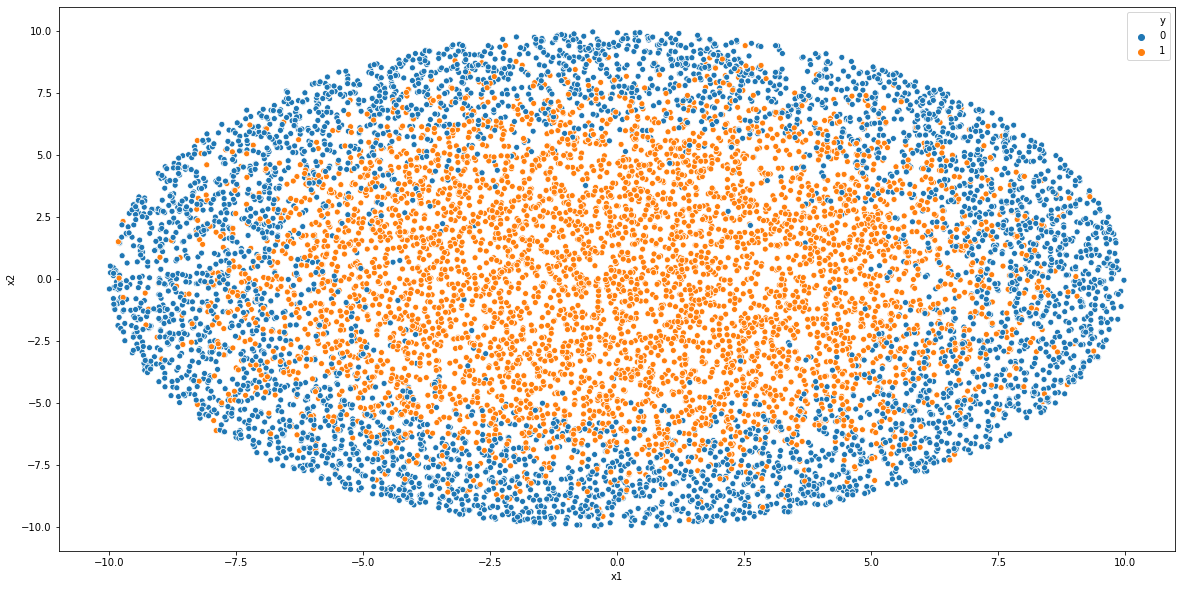

In [3]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x="x1", y="x2", hue="y", data = df)

plt.show()

После просмотра данных встает несколько вопросов:
 * 1) Можем ли мы построить идеальную модель ? (условная метрика точность)
 * 2) Что ещё мы хотим знать о выборке?
 * 3) Какие алгоритмы машинного обучения мы можем эффективно здесь использовать?

После описательного анализа приступим к построению моделей. Для начала посмотрим, что нам даст Логистическая регрессия. 

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score

# разобьем выборку на трэйн/тест
X_train, X_test, y_train, y_test = train_test_split(df[['x1','x2']], df['y'], test_size = 0.33)

Точность нашей модели 0.5896969696969697


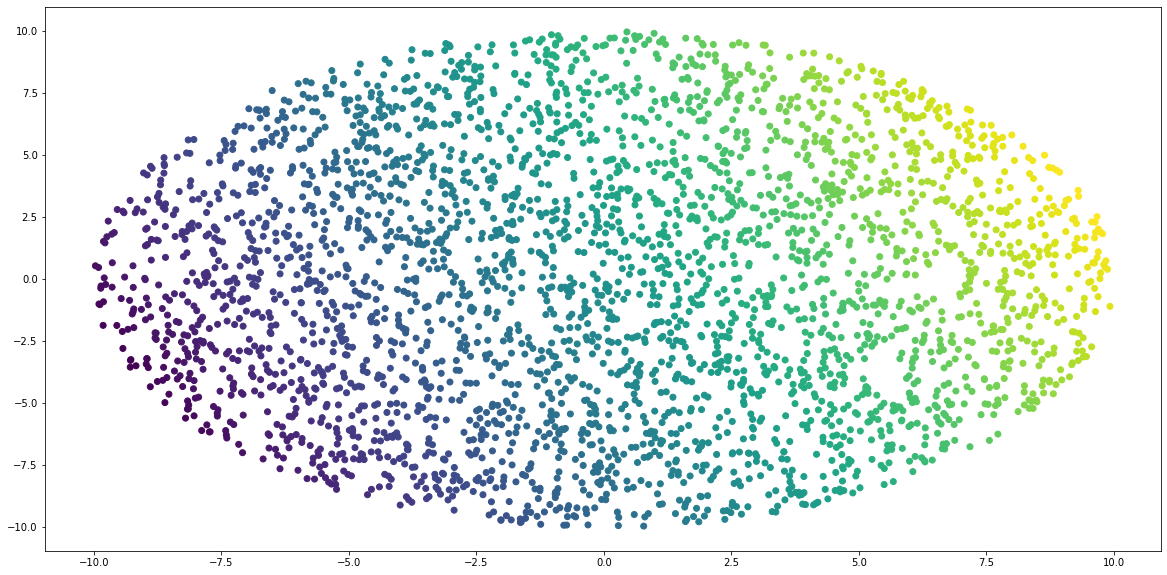

In [5]:
from sklearn.linear_model import LogisticRegression


#########################################
# Ваш код для Логистической регрессии
logit = LogisticRegression(random_state=13).fit(X_train, y_train)
predict_logit =  logit.predict(X_test)
predict_log_proba = logit.predict_log_proba(X_test)

#########################################


print(f'Точность нашей модели {accuracy_score(predict_logit, y_test)}')

# Заодно завизуализируем полученные результаты
plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_log_proba[:,1])
plt.show()

Вообще машинное обучение не только про алгоритмы (нейронные сети не исключение),
 а скорее про обработку данных. Что нам надо добавить, чтобы наш алгоритм отработал без проблем?

Точность нашей модели 0.8369696969696969


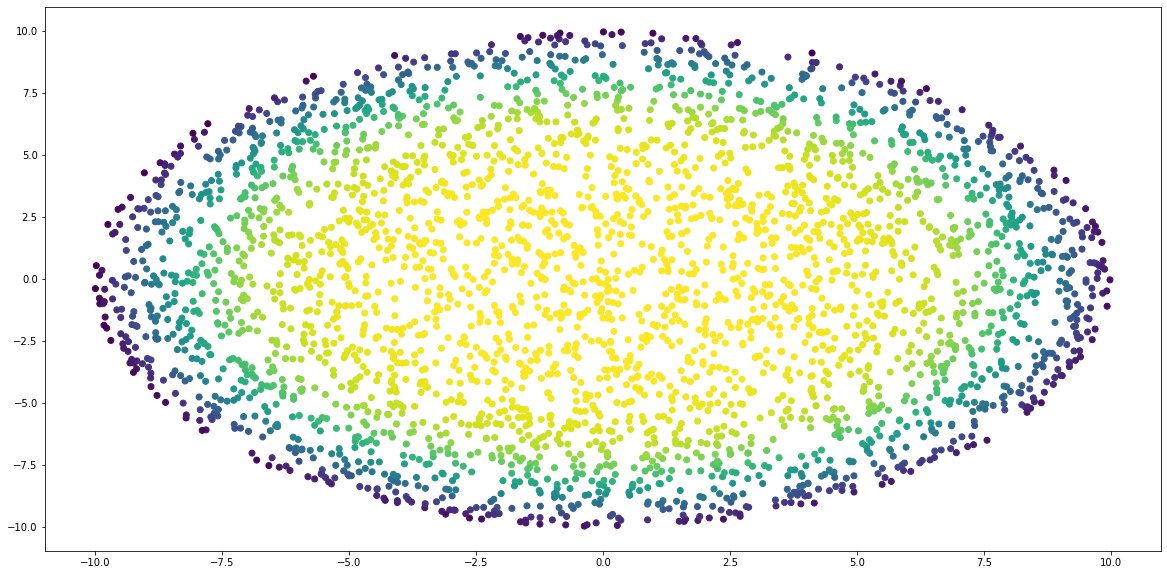

In [6]:
# Повторяем наш код, только с новыми фичами - смотрим на магию
df_new = df.copy()

#########################################
# ваш код для фичей и новой модели

df_new['new_feature_1'] = df.x1**2 + df.x2**2

X_train_new, X_test_new, y_train_new, y_test_new = train_test_split(df_new[['x1', 'x2', 'new_feature_1']],
                                                                    df_new['y'], test_size = 0.33)

logit = LogisticRegression(random_state=13).fit(X_train_new, y_train_new)
predict_logit = logit.predict(X_test_new)
predict_log_proba = logit.predict_log_proba(X_test_new)

#########################################

print(f'Точность нашей модели {accuracy_score(predict_logit,y_test_new)}')

plt.figure(figsize=(20, 10))
plt.scatter(X_test_new['x1'], X_test_new['x2'], c = predict_log_proba[:,1])
plt.show()

Переходим к следующиму классу алгоритмов - деревья решений. Какая особенность есть у деревьев? Какой параметр надо зафикисировать, чтобы эта особенность не испортила обучение? 

Особенность деревьев состоит в том, что они могут идеально предсказать обучающую выборку. Однако такая ситуация приведет к переобучению, и алгоритм плохо отработает на тестовой выборке. Чтобы не допустить переобучения, будем контролировать параметр min_samples_leaf.

Точность нашей модели 0.7966666666666666


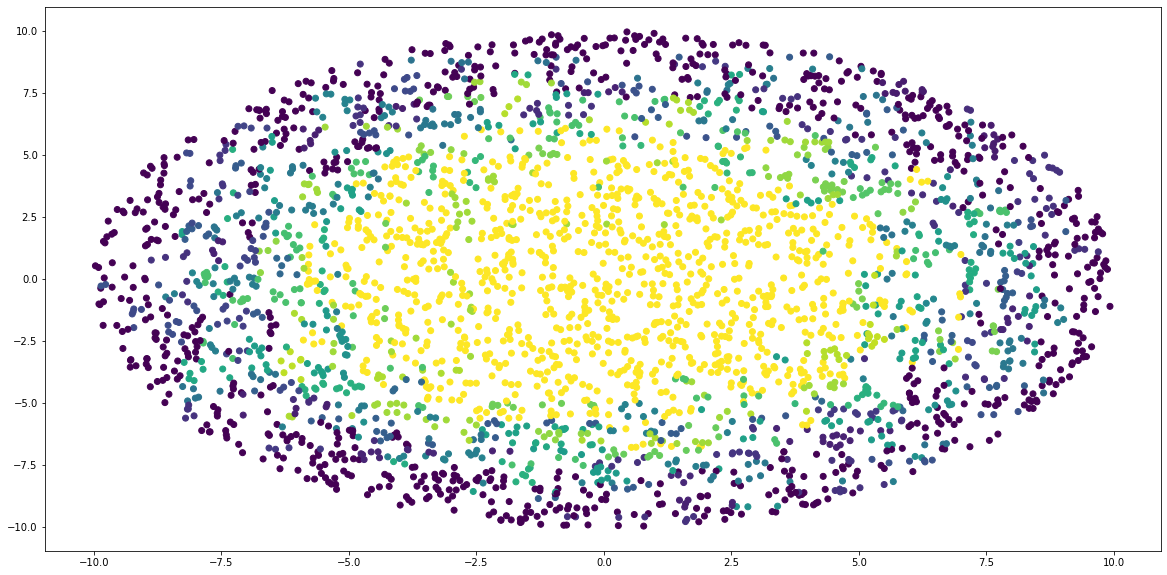

In [7]:
from sklearn.tree import DecisionTreeClassifier

#########################################
tree = DecisionTreeClassifier(min_samples_leaf=7, random_state=13).fit(X_train, y_train)

predict_tree = tree.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_tree, y_test)}')

predict_tree_proba = tree.predict_proba(X_test)

#########################################

plt.figure(figsize=(20,10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_tree_proba[:,1])
plt.show()

Поможет ли в данном случае ансамблирование? Когда в целом ансамбль дает хорошие результаты?

Ансамбль обычно дает хорошие результаты, если используем много глубоких деревьев.

Точность нашей модели 0.8233333333333334


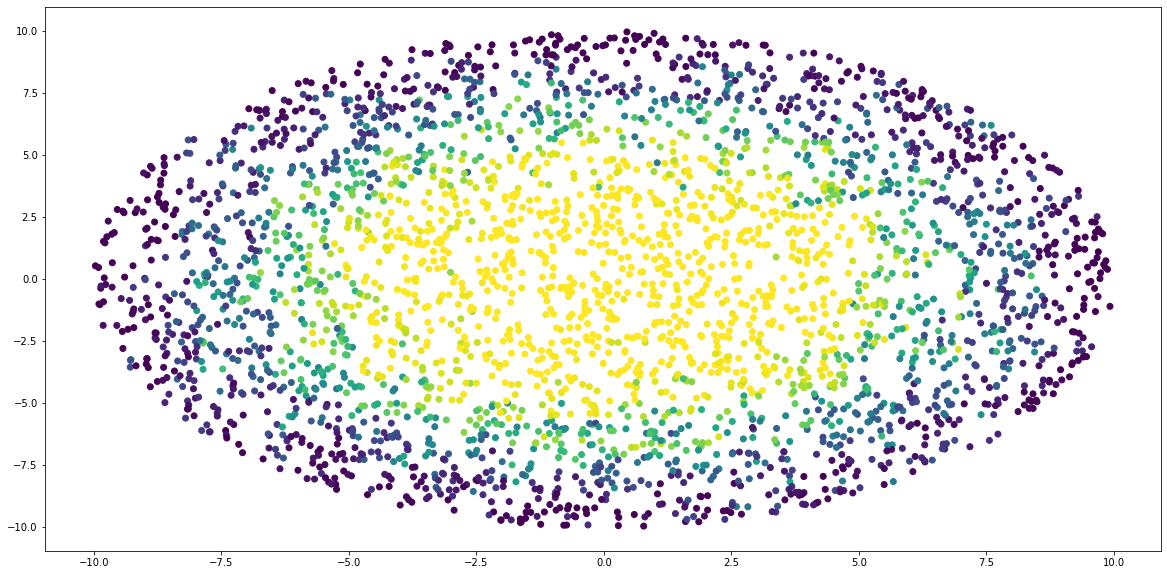

In [8]:
from sklearn.ensemble import RandomForestClassifier

#########################################
# Ваш код

rfc = RandomForestClassifier(n_estimators=1500, random_state=13).fit(X_train, y_train)
predict_forest = rfc.predict(X_test)
print(f'Точность нашей модели {accuracy_score(predict_forest, y_test)}')

predict_forest_proba = rfc.predict_proba(X_test)

#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_forest_proba[:,1])
plt.show()

ну и наконец мы добрались до нейронок - пора собрать нашу нейроночку под эту задачу.

Соберем простенькую нейронку - нам хватит 2х слоев по 5 нейронов в каждом. Смотрим на предыдущую тетрадку и копипастим все, что мы там видим! (можно для убыстрения процесса добавить callback с ранней остановкой)

In [9]:
# Подгружаем tensorflow 
import tensorflow as tf
keras = tf.keras

print(tf.__version__)
print(keras.__version__) 

from tensorflow.keras.models import Sequential # Последовательность слоёв
from tensorflow.keras import layers as L # Разные слои
import tensorflow.keras.optimizers as opt # Оптимизаторы

2.2.0
2.3.0-tf


Точность нашей модели 0.8487878787878788


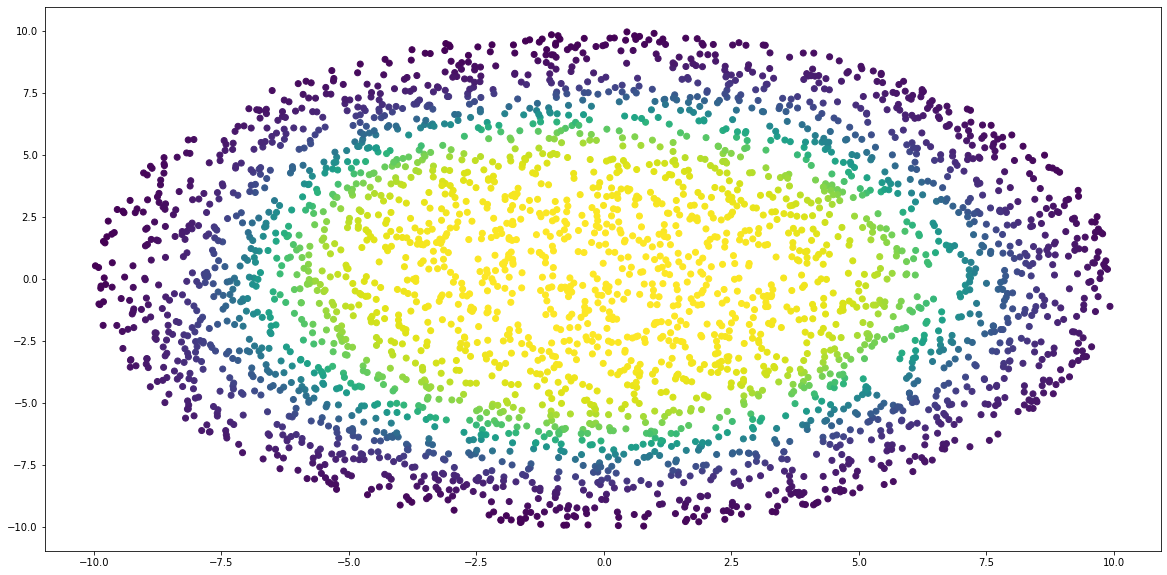

In [10]:
#########################################
def get_new_model( ):

    model = Sequential()  
    
    # Добавляем в нашу модель первый слой из 5 нейронов
    # входная резмерность - количество признаков
    # начальные веса получаем из случайного нормального распределения
    model.add(L.Dense(5, input_dim = X_train.shape[1], kernel_initializer='random_normal'))

    # Добавляем функцию активации на первый слой 
    model.add(L.Activation('sigmoid'))

    # Добавляем ещё один слой из 5 нейронов
    model.add(L.Dense(5, kernel_initializer='random_normal'))
    model.add(L.Activation('sigmoid'))

    # На выходе мы должны получить вероятности того, что объект относится к классу 1 
    model.add(L.Dense(1, activation='sigmoid', kernel_initializer = 'random_normal'))
    
    optimizer = opt.Adam(lr=1e-3)

    # Собираем модель
    model.compile(loss = 'binary_crossentropy', 
                  metrics=["accuracy"], 
                  optimizer=optimizer)
    
    return model

nn = get_new_model( ) 
nn.fit(X_train, y_train, validation_split=0.2, epochs=1000, 
                  verbose=0)


predict_neural = nn.predict(X_test)
predict_classes = (nn.predict(X_test) > 0.5).astype("int32")

print(f'Точность нашей модели {accuracy_score(predict_classes, y_test)}')
#########################################

plt.figure(figsize=(20, 10))
plt.scatter(X_test['x1'], X_test['x2'], c = predict_neural)
plt.show()

На этом наше приключение сегодня закончилось. Вопросы максимально желательны :)